In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

MNIST 데이터셋을 로딩하는 `input_data`는 GitHub의 [tensorflow/contrib/learn/python/learn/datasets/mnist.py](https://github.com/tensorflow/tensorflow/blob/master/tensorflow/contrib/learn/python/learn/datasets/mnist.py) 코드 참고.

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('data')

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


In [3]:
mnist.train.images.shape, mnist.train.labels.shape

((55000, 784), (55000,))

In [4]:
mnist.test.images.shape, mnist.test.labels.shape

((10000, 784), (10000,))

In [5]:
28 * 28

784

In [6]:
mnist.train.images.min(), mnist.train.images.max()

(0.0, 1.0)

In [7]:
mnist.train.labels.min(), mnist.train.labels.max()

(0, 9)

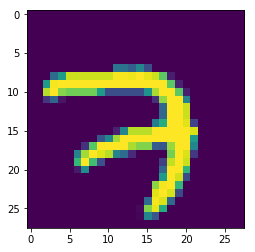

In [8]:
plt.imshow(mnist.train.images[0].reshape(28, 28))
plt.show()

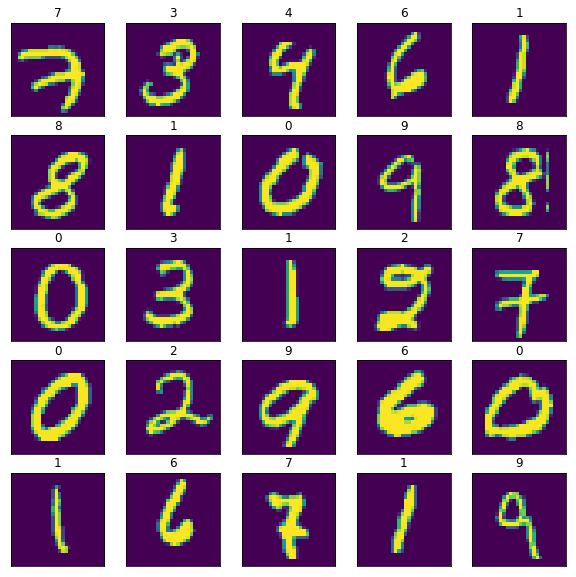

In [9]:
images = mnist.train.images
labels = mnist.train.labels

fig, axes = plt.subplots(5, 5, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.imshow(images[i].reshape(28, 28))
    ax.set_title(labels[i])

plt.show()

In [10]:
learning_rate = 0.05
batch_size = 100

In [11]:
x = tf.placeholder(tf.float32, [None, 28 * 28])
y = tf.placeholder(tf.int64, [None])

w = tf.Variable(tf.truncated_normal([28 * 28, 10], stddev=0.1))
b = tf.Variable(tf.truncated_normal([10], stddev=0.1))

u = tf.matmul(x, w) + b
z = tf.nn.softmax(u)

cross_entropy = -tf.reduce_sum(tf.one_hot(y, 10) * tf.log(z), axis=1)
loss = tf.reduce_mean(cross_entropy)

train = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [12]:
predict = tf.argmax(z, axis=1)
correct = tf.equal(predict, y)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [13]:
session = tf.Session()
session.run(tf.global_variables_initializer())

test_data = {
    x: mnist.test.images,
    y: mnist.test.labels
}

for i in range(100):
    print('----')
    print(i + 1)
    for j in range(10):
        images, labels = mnist.train.next_batch(batch_size)
        data = {
            x: images,
            y: labels
        }
        session.run(train, feed_dict=data)
    print('loss = %f' % session.run(loss, feed_dict=data))
    print('accuracy = %f' % session.run(accuracy, feed_dict=test_data))

----
1
loss = 1.972808
accuracy = 0.387500
----
2
loss = 1.538564
accuracy = 0.537000
----
3
loss = 1.320564
accuracy = 0.625500
----
4
loss = 1.212972
accuracy = 0.681900
----
5
loss = 1.194605
accuracy = 0.719600
----
6
loss = 0.995164
accuracy = 0.741300
----
7
loss = 0.908739
accuracy = 0.763500
----
8
loss = 0.945680
accuracy = 0.774900
----
9
loss = 0.955595
accuracy = 0.790000
----
10
loss = 0.764781
accuracy = 0.799100
----
11
loss = 0.781634
accuracy = 0.806400
----
12
loss = 0.677874
accuracy = 0.812100
----
13
loss = 0.705867
accuracy = 0.817300
----
14
loss = 0.818584
accuracy = 0.821700
----
15
loss = 0.703262
accuracy = 0.829600
----
16
loss = 0.656168
accuracy = 0.836400
----
17
loss = 0.668133
accuracy = 0.838400
----
18
loss = 0.653749
accuracy = 0.841500
----
19
loss = 0.654054
accuracy = 0.844400
----
20
loss = 0.707656
accuracy = 0.846700
----
21
loss = 0.594593
accuracy = 0.846200
----
22
loss = 0.595665
accuracy = 0.850500
----
23
loss = 0.546104
accuracy = 0.8543

In [14]:
np.arange(3)[[True, False, True]]

array([0, 2])

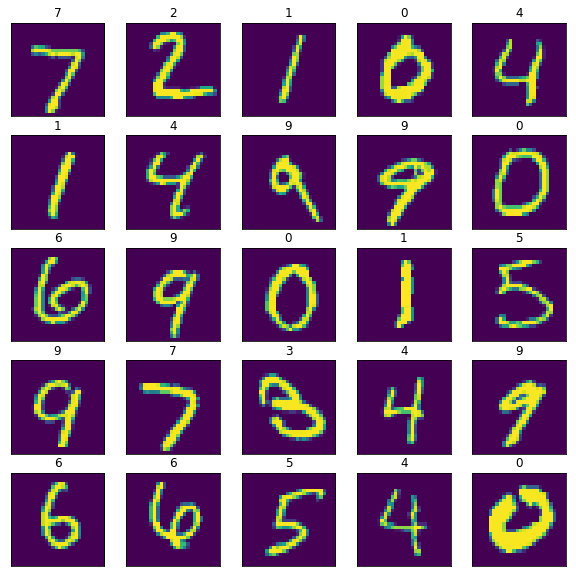

In [15]:
images = mnist.test.images
labels = mnist.test.labels

p, c = session.run([predict, correct], feed_dict=test_data)

fig, axes = plt.subplots(5, 5, figsize=(10, 10))

for i, ax in zip(np.arange(len(c))[c][:25], axes.flat):
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.imshow(images[i].reshape(28, 28))
    ax.set_title(labels[i])

plt.show()

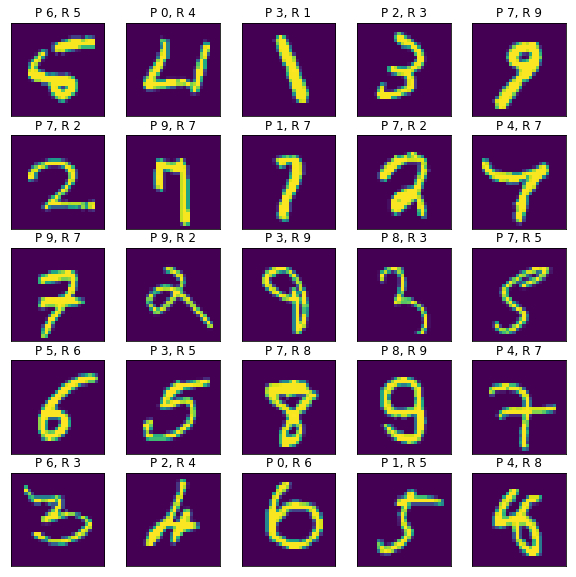

In [16]:
fig, axes = plt.subplots(5, 5, figsize=(10, 10))

for i, ax in zip(np.arange(len(c))[~c][:25], axes.flat):
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.imshow(images[i].reshape(28, 28))
    ax.set_title('P {}, R {}'.format(p[i], labels[i]))

plt.show()

In [17]:
x = tf.placeholder(tf.float32, [None, 28 * 28])
y = tf.placeholder(tf.int64, [None])

# Hidden Layer (28*28 -> 200)

w1 = tf.Variable(tf.truncated_normal([28 * 28, 200], stddev=0.1))
b1 = tf.Variable(tf.truncated_normal([200], stddev=0.1))

u1 = tf.matmul(x, w1) + b1
z1 = tf.nn.softmax(u1)

# Output Layer (200 -> 10)

w2 = tf.Variable(tf.truncated_normal([200, 10], stddev=0.1))
b2 = tf.Variable(tf.truncated_normal([10], stddev=0.1))

u2 = tf.matmul(z1, w2) + b2
z = tf.nn.softmax(u2)

cross_entropy = -tf.reduce_sum(tf.one_hot(y, 10) * tf.log(z), axis=1)
loss = tf.reduce_mean(cross_entropy)

train = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [18]:
x = tf.placeholder(tf.float32, [None, 28 * 28])
y = tf.placeholder(tf.int64, [None])

def layer(x, in_size, out_size, activation):
    w = tf.Variable(tf.truncated_normal([in_size, out_size], stddev=0.1))
    b = tf.Variable(tf.truncated_normal([out_size], stddev=0.1))
    u = tf.matmul(x, w) + b
    return activation(u)

z1 = layer(x, 28 * 28, 500, tf.nn.relu)
z = layer(z1, 500, 10, tf.nn.softmax)

cross_entropy = -tf.reduce_sum(tf.one_hot(y, 10) * tf.log(z), axis=1)
loss = tf.reduce_mean(cross_entropy)

learning_rate = 0.0001
train = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [19]:
predict = tf.argmax(z, axis=1)
correct = tf.equal(predict, y)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [20]:
session = tf.Session()
session.run(tf.global_variables_initializer())

test_data = {
    x: mnist.test.images,
    y: mnist.test.labels
}

for i in range(100):
    print('----')
    print(i + 1)
    for j in range(10):
        images, labels = mnist.train.next_batch(batch_size)
        data = {
            x: images,
            y: labels
        }
        session.run(train, feed_dict=data)
    print('loss = %f' % session.run(loss, feed_dict=data))
    print('accuracy = %f' % session.run(accuracy, feed_dict=test_data))

----
1
loss = 2.561146
accuracy = 0.131400
----
2
loss = 2.327387
accuracy = 0.210300
----
3
loss = 2.034136
accuracy = 0.310900
----
4
loss = 1.722838
accuracy = 0.414000
----
5
loss = 1.566905
accuracy = 0.525100
----
6
loss = 1.268678
accuracy = 0.610200
----
7
loss = 1.295262
accuracy = 0.671900
----
8
loss = 1.102059
accuracy = 0.712000
----
9
loss = 0.975120
accuracy = 0.746200
----
10
loss = 0.906852
accuracy = 0.770400
----
11
loss = 0.779494
accuracy = 0.788200
----
12
loss = 0.857750
accuracy = 0.801500
----
13
loss = 0.734998
accuracy = 0.809700
----
14
loss = 0.748343
accuracy = 0.822500
----
15
loss = 0.755577
accuracy = 0.834900
----
16
loss = 0.633931
accuracy = 0.843300
----
17
loss = 0.578964
accuracy = 0.847200
----
18
loss = 0.621485
accuracy = 0.854200
----
19
loss = 0.466385
accuracy = 0.858100
----
20
loss = 0.608127
accuracy = 0.861900
----
21
loss = 0.673861
accuracy = 0.866500
----
22
loss = 0.642921
accuracy = 0.868600
----
23
loss = 0.592120
accuracy = 0.8717

In [21]:
x = tf.placeholder(tf.float32, [None, 28 * 28])
y = tf.placeholder(tf.int64, [None])

def layer(x, in_size, out_size, activation):
    w = tf.Variable(tf.truncated_normal([in_size, out_size], stddev=0.1))
    b = tf.Variable(tf.truncated_normal([out_size], stddev=0.1))
    u = tf.matmul(x, w) + b
    return activation(u)

z1 = layer(x, 28 * 28, 1000, tf.nn.relu)
z2 = layer(z1, 1000, 500, tf.nn.relu)
z = layer(z2, 500, 10, tf.nn.softmax)

cross_entropy = -tf.reduce_sum(tf.one_hot(y, 10) * tf.log(z), axis=1)
loss = tf.reduce_mean(cross_entropy)

train = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [22]:
predict = tf.argmax(z, axis=1)
correct = tf.equal(predict, y)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [23]:
session = tf.Session()
session.run(tf.global_variables_initializer())

test_data = {
    x: mnist.test.images,
    y: mnist.test.labels
}

for i in range(100):
    print('----')
    print(i + 1)
    for j in range(10):
        images, labels = mnist.train.next_batch(batch_size)
        data = {
            x: images,
            y: labels
        }
        session.run(train, feed_dict=data)
    print('loss = %f' % session.run(loss, feed_dict=data))
    print('accuracy = %f' % session.run(accuracy, feed_dict=test_data))

----
1
loss = 3.634250
accuracy = 0.140800
----
2
loss = 3.523395
accuracy = 0.141500
----
3
loss = 3.123080
accuracy = 0.138900
----
4
loss = 3.095024
accuracy = 0.137600
----
5
loss = 3.242046
accuracy = 0.138900
----
6
loss = 3.067422
accuracy = 0.139900
----
7
loss = 3.121402
accuracy = 0.140100
----
8
loss = 3.326494
accuracy = 0.141300
----
9
loss = 2.946113
accuracy = 0.142800
----
10
loss = 2.975467
accuracy = 0.144200
----
11
loss = 2.798931
accuracy = 0.144900
----
12
loss = 2.691748
accuracy = 0.147300
----
13
loss = 2.812666
accuracy = 0.148900
----
14
loss = 2.555149
accuracy = 0.151600
----
15
loss = 2.823708
accuracy = 0.152000
----
16
loss = 2.853589
accuracy = 0.155200
----
17
loss = 2.767587
accuracy = 0.156800
----
18
loss = 2.703007
accuracy = 0.159500
----
19
loss = 2.857772
accuracy = 0.161600
----
20
loss = 2.772503
accuracy = 0.162500
----
21
loss = 2.542213
accuracy = 0.164800
----
22
loss = 2.618058
accuracy = 0.166100
----
23
loss = 2.594879
accuracy = 0.1690

In [24]:
x = tf.placeholder(tf.float32, [None, 28 * 28])
y = tf.placeholder(tf.int64, [None])
keep_prob = tf.placeholder(tf.float32)

def layer(x, in_size, out_size, activation):
    w = tf.Variable(tf.truncated_normal([in_size, out_size], stddev=0.1))
    b = tf.Variable(tf.truncated_normal([out_size], stddev=0.1))
    u = tf.matmul(x, w) + b
    return activation(u)

z1 = layer(x, 28 * 28, 1000, tf.nn.relu)
z2 = layer(z1, 1000, 500, tf.nn.relu)
drop = tf.nn.dropout(z2, keep_prob)
z = layer(z2, 500, 10, tf.nn.softmax)

cross_entropy = -tf.reduce_sum(tf.one_hot(y, 10) * tf.log(z), axis=1)
loss = tf.reduce_mean(cross_entropy)

train = tf.train.AdamOptimizer(0.0001).minimize(loss)

In [25]:
predict = tf.argmax(z, axis=1)
correct = tf.equal(predict, y)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [26]:
session = tf.Session()
session.run(tf.global_variables_initializer())

test_data = {
    x: mnist.test.images,
    y: mnist.test.labels,
    keep_prob: 1.0
}

for i in range(100):
    print('----')
    print(i + 1)
    for j in range(10):
        images, labels = mnist.train.next_batch(batch_size)
        data = {
            x: images,
            y: labels,
            keep_prob: 0.5
        }
        session.run(train, feed_dict=data)
    print('loss = %f' % session.run(loss, feed_dict=data))
    print('accuracy = %f' % session.run(accuracy, feed_dict=test_data))

----
1
loss = 2.200759
accuracy = 0.328200
----
2
loss = 1.279563
accuracy = 0.555600
----
3
loss = 1.075051
accuracy = 0.688200
----
4
loss = 0.806316
accuracy = 0.752700
----
5
loss = 0.746265
accuracy = 0.790700
----
6
loss = 0.626053
accuracy = 0.818300
----
7
loss = 0.543348
accuracy = 0.835200
----
8
loss = 0.525248
accuracy = 0.850200
----
9
loss = 0.484442
accuracy = 0.852200
----
10
loss = 0.436607
accuracy = 0.868300
----
11
loss = 0.458858
accuracy = 0.877700
----
12
loss = 0.540158
accuracy = 0.879900
----
13
loss = 0.347997
accuracy = 0.889100
----
14
loss = 0.344459
accuracy = 0.891900
----
15
loss = 0.388999
accuracy = 0.896500
----
16
loss = 0.340088
accuracy = 0.893500
----
17
loss = 0.448169
accuracy = 0.901300
----
18
loss = 0.256820
accuracy = 0.901400
----
19
loss = 0.349223
accuracy = 0.904500
----
20
loss = 0.245198
accuracy = 0.909600
----
21
loss = 0.388834
accuracy = 0.910000
----
22
loss = 0.359623
accuracy = 0.914300
----
23
loss = 0.189585
accuracy = 0.9143

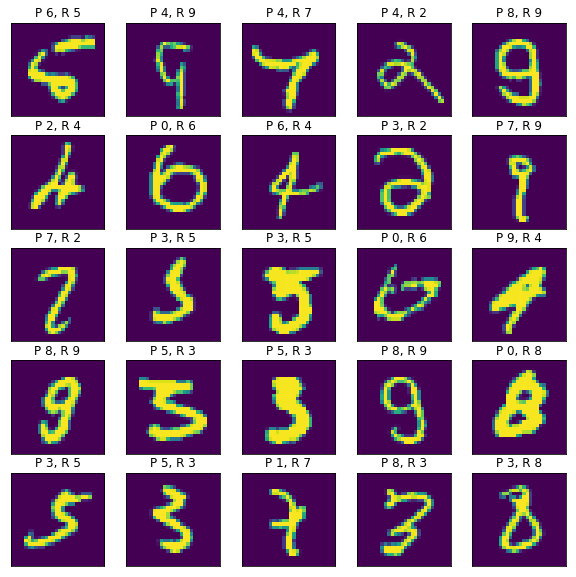

In [27]:
images = mnist.test.images
labels = mnist.test.labels

p, c = session.run([predict, correct], feed_dict=test_data)

fig, axes = plt.subplots(5, 5, figsize=(10, 10))

for i, ax in zip(np.arange(len(c))[~c][:25], axes.flat):
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.imshow(images[i].reshape(28, 28))
    ax.set_title('P {}, R {}'.format(p[i], labels[i]))

plt.show()